In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as ctx
import datetime

In [2]:
perimeters = gpd.read_file('./hist.shp')
print(perimeters.shape)
perimeters = perimeters[~perimeters.year.isna()]
perimeters.year = perimeters.year.astype(int)
print(perimeters.shape)

(92531, 14)
(92474, 14)


In [3]:
perimeters.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
0,view_historical_fires.fid--6c64548_17013a0304a...,2006,Bar Complex,USFS,8549.790,None,None,None,None,Pigeon Fire,None,2006-09-09,None,"MULTIPOLYGON (((-123.13544 40.80920, -123.1350..."
1,view_historical_fires.fid--6c64548_17013a0304a...,2006,Ralston,USFS,4260.292,None,None,None,None,None,None,2006-09-09,None,"POLYGON ((-120.66164 39.02016, -120.66182 39.0..."
2,view_historical_fires.fid--6c64548_17013a0304a...,2006,Uncles Complex,USFS,12385.665,None,None,None,None,Hancock Fire,None,2006-09-09,None,"MULTIPOLYGON (((-123.24093 41.48353, -123.2409..."
3,view_historical_fires.fid--6c64548_17013a0304a...,2006,Red Mountain,USFS,32828.199,None,None,None,None,None,None,2006-09-08,None,"MULTIPOLYGON (((-115.28717 44.40964, -115.2884..."
4,view_historical_fires.fid--6c64548_17013a0304a...,2006,Derby,USFS,204864.145,None,None,None,None,None,None,2006-09-08,None,"POLYGON ((-110.10493 45.60148, -110.10340 45.6..."


In [4]:
# Do we have unique fires?
len(perimeters.id.unique())==perimeters.shape[0]

True

In [5]:
from shapely.geometry import Point
MIN_LAT, MAX_LAT = 32.4, 33.6
MIN_LONG, MAX_LONG = -118, -116
sd_perimeters = perimeters.cx[MIN_LONG:MAX_LONG, MIN_LAT:MAX_LAT]
print(sd_perimeters.shape)
sd_perimeters.crs = {'init' :'epsg:4326'}
sd_perimeters = sd_perimeters.to_crs(epsg=3857)
sd_perimeters.head()

(2004, 14)


C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
230,view_historical_fires.fid--6c64548_17013a0304a...,2006,Bonny,BLM,35.437000,None,None,None,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871..."
272,view_historical_fires.fid--6c64548_17013a0304a...,2006,BORDER 15,CDF,19.854897,None,None,None,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959..."
285,view_historical_fires.fid--6c64548_17013a0304a...,2006,CAMINO,CDF,2.808180,None,None,None,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396..."
589,view_historical_fires.fid--6c64548_17013a0304a...,2006,Horse Fire,USFS,7041.781000,None,None,None,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437..."
673,view_historical_fires.fid--6c64548_17013a0304a...,2006,Cottonwood,BLM,24.682000,None,None,None,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496..."


In [6]:
sd_perimeters = sd_perimeters[sd_perimeters['year']>2000].reset_index(drop=True)
print(sd_perimeters.shape)
sd_perimeters.head()

(599, 14)


,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
0,view_historical_fires.fid--6c64548_17013a0304a...,2006,Bonny,BLM,35.437000,None,None,None,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871..."
1,view_historical_fires.fid--6c64548_17013a0304a...,2006,BORDER 15,CDF,19.854897,None,None,None,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959..."
2,view_historical_fires.fid--6c64548_17013a0304a...,2006,CAMINO,CDF,2.808180,None,None,None,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396..."
3,view_historical_fires.fid--6c64548_17013a0304a...,2006,Horse Fire,USFS,7041.781000,None,None,None,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437..."
4,view_historical_fires.fid--6c64548_17013a0304a...,2006,Cottonwood,BLM,24.682000,None,None,None,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496..."


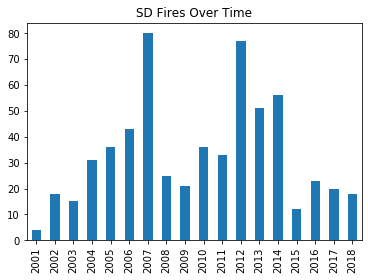

In [7]:
sd_perimeters.year.value_counts().sort_index().plot.bar()
plt.title("SD Fires Over Time");

In [8]:
# Percent missingness
(sd_perimeters.isna().sum()/sd_perimeters.shape[0])*100

id              0.000000
year            0.000000
fire_name       0.500835
agency          0.834725
acres           0.000000
mapmethod      89.816361
inciwebid      95.993322
alarm_date     56.093489
cont_date      57.762938
comments       61.769616
complex_na    100.000000
perimeter_     44.407346
cause          56.260434
geometry        0.000000
dtype: float64

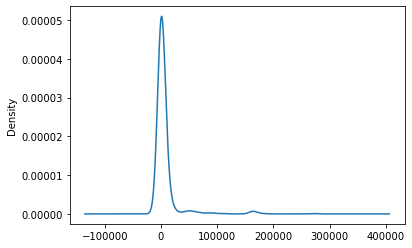

In [9]:
# Fair amount of missing data, year and acres are reliable:
sd_perimeters.acres.plot.density()

In [10]:
sd_perimeters['final_date'] = sd_perimeters['alarm_date'].combine_first(sd_perimeters['perimeter_'])
sd_perimeters['final_date'] = pd.to_datetime(sd_perimeters['final_date'])
sd_perimeters['cont_date'] = pd.to_datetime(sd_perimeters['cont_date'])

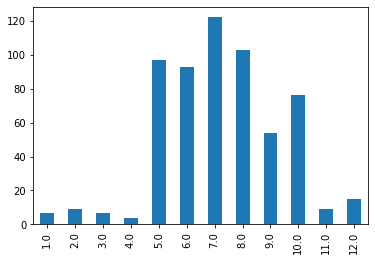

In [11]:
sd_perimeters.final_date.map(lambda x: x.month).value_counts().sort_index().plot.bar()

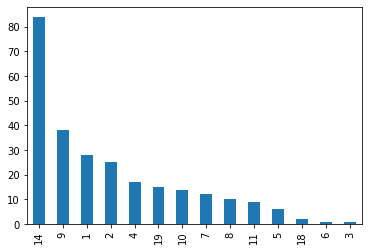

In [12]:
sd_perimeters.cause.value_counts().plot.bar()
# Looks like the causes are by a cause key, which I am not sure we have

In [13]:
sd_perimeters['burn_days'] = (sd_perimeters['cont_date'] - sd_perimeters['final_date']).dt.days

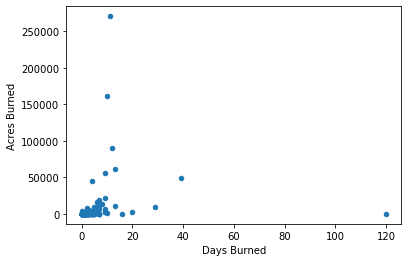

In [14]:
plt.scatter(sd_perimeters.burn_days, sd_perimeters.acres,s=20)
plt.xlabel('Days Burned')
plt.ylabel('Acres Burned');

In [15]:
sd_perimeters[(sd_perimeters['fire_name']=='Vallecito Lightning Complex')& (sd_perimeters['acres']== 519.4)]

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry,final_date,burn_days
164,view_historical_fires.fid--6c64548_17013a0304a...,2012,Vallecito Lightning Complex,State Agency,519.4,None,None,None,NaT,None,None,2012-08-15,None,"POLYGON ((-12970126.513 3897030.356, -12970141...",2012-08-15,NaN
173,view_historical_fires.fid--6c64548_17013a0304a...,2012,Vallecito Lightning Complex,State Agency,519.4,None,None,None,NaT,None,None,2012-08-18,None,"POLYGON ((-12970126.513 3897030.356, -12970141...",2012-08-18,NaN
180,view_historical_fires.fid--6c64548_17013a0304a...,2012,Vallecito Lightning Complex,State Agency,519.4,None,None,None,NaT,None,None,2012-08-19,None,"POLYGON ((-12970126.513 3897030.356, -12970141...",2012-08-19,NaN


In [16]:
sd_perimeters.drop(['id'], axis=1,inplace=True)
sd_perimeters.drop_duplicates(inplace=True)

In [17]:
sd_perimeters = sd_perimeters[sd_perimeters['acres']>1000]
sd_perimeters.fire_name.value_counts()

Border 3                      17
Basilone Complex              13
Eagle                         10
Poomacha                       9
LILAC 5                        9
                              ..
PINES                          1
TOMAHAWK- BASILONE COMPLEX     1
PINE                           1
POOMACHA                       1
COMBAT-BASILONE COMPLEX        1
Name: fire_name, Length: 71, dtype: int64

In [18]:
fire_src = sd_perimeters[['fire_name','acres','final_date']].sort_values(by=['fire_name', 'acres','final_date'])

In [19]:
fire_lookup = fire_src.groupby((['fire_name','acres']),as_index=False).final_date.min()

In [20]:
fire_final = pd.merge(fire_lookup,sd_perimeters, how='inner', left_on=['fire_name','acres','final_date'], right_on = ['fire_name','acres','final_date'])

In [21]:
# Convert back to geoPandas
fire_finalg = gpd.GeoDataFrame(fire_final)
fire_finalg.drop(['alarm_date','cont_date','perimeter_','year'],axis=1,inplace=True)
fire_finalg['final_date'] = fire_finalg['final_date'].astype(str)

In [22]:
fire_finalg.to_file("sd_fire_final_dedupe.shp")